Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [ ]:
#libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rental_bike= pd.read_csv('D:\\day.csv')

In [3]:
rental_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the information
rental_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
rental_bike.shape

(730, 16)

### Points:
dataset have 730 rows and 16 columns

In [6]:
rental_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### DATA PREPRATION

In [7]:
#checking information about dataset

rental_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Points:
Dataset have all integer type column except 'dteday' column

In [8]:
#lets check the null value

round(100*(rental_bike.isnull().sum()/len(rental_bike)),2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

#### Points:
No null value found

### Data Cleaning

#### Lets drop unwated columns:
>By checking the data we are able to find 'instant' column has unique value and we do not want it.

>We have year column as 'yr' and month column as 'mnth' so now we need not to consider 'dteday' column in our dataset

> 'Casual' and 'Registerd' columns are highly corelated with 'cnt' column so we can drop them as well.

>Lets drop the 'instant','dteday', 'casual', and 'registered' column



In [9]:
bike_new=rental_bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]


In [10]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Create Dummy Variable
Now we are able to find we need to create dummy variable and for dummy varialbe we need to convert variable as object datatype

In [11]:
#convert to 'category' data type
bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [12]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [13]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [14]:
bike_new.shape

(730, 30)

### Data Splitting
Will split the data into Train and Test data set into 70:30 ratio

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 350)

In [17]:
#lets check the dataframe

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 229 to 638
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [19]:
df_train.shape

(510, 30)

In [20]:
df_test.shape

(219, 30)

### Data Analysis

EDA on training dataset

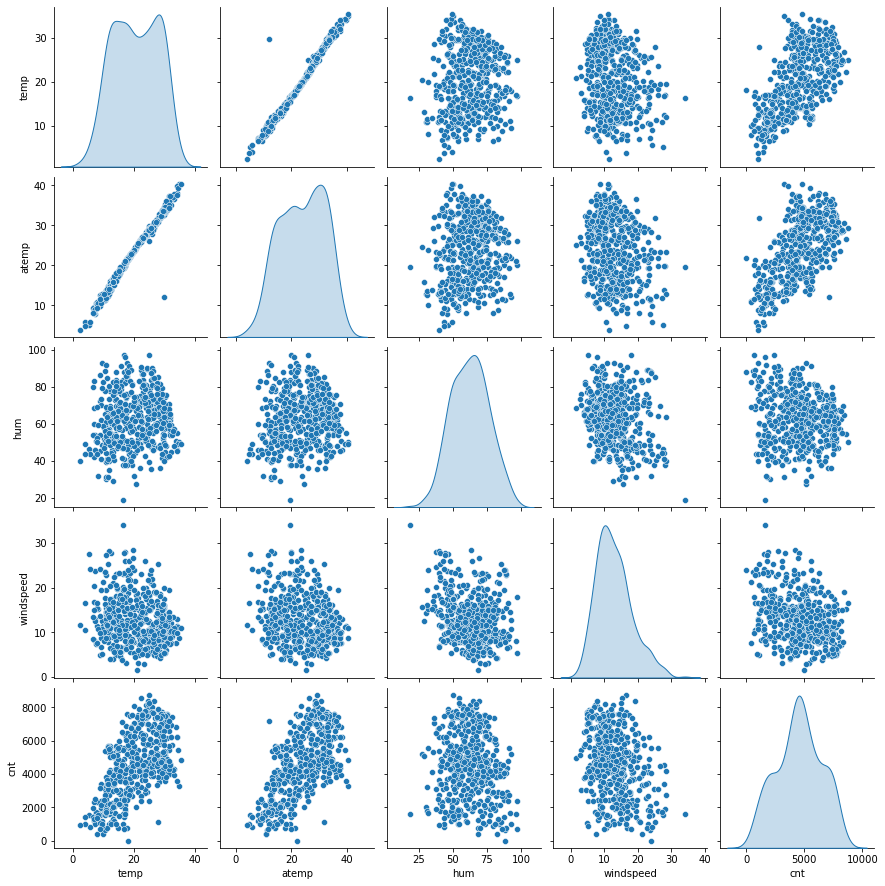

In [21]:
#lets visualize the variables
bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#### Points:
    now we can see here linear relation between 'tem', 'atem' and 'cnt'

In [22]:
#lets check numerical and categorical

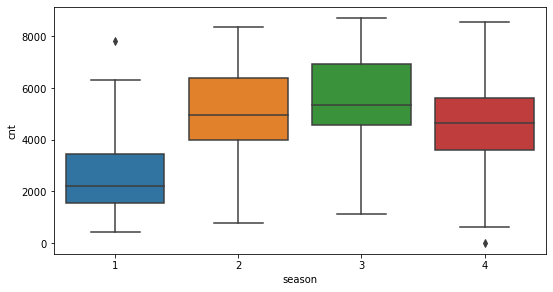

In [23]:
# lets build boxplot of all the variables to get an idea obout variable it will gives an idean to create dummy variables
plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
sns.boxplot(x= 'season', y='cnt', data = rental_bike)
plt.show()

#### insights
Season median of seasion 3 over 5000 is the highst among the all. season2 and season4 also have bike booking approx 27% and 25% repectively. seasion is a good predictor for dependent variable

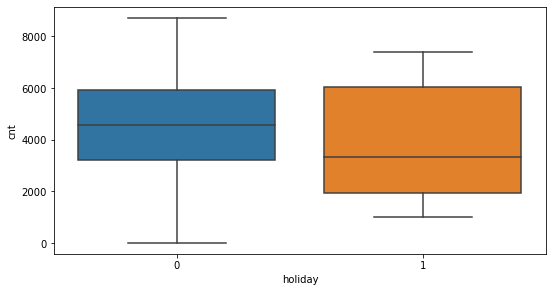

In [24]:
plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
sns.boxplot(x= 'holiday', y= 'cnt', data=  rental_bike)
plt.show()

#### Insights
Holiday is a bad predictor for dependent variable. As we can see here more 95% of bikes were booked when it is not a holiday.

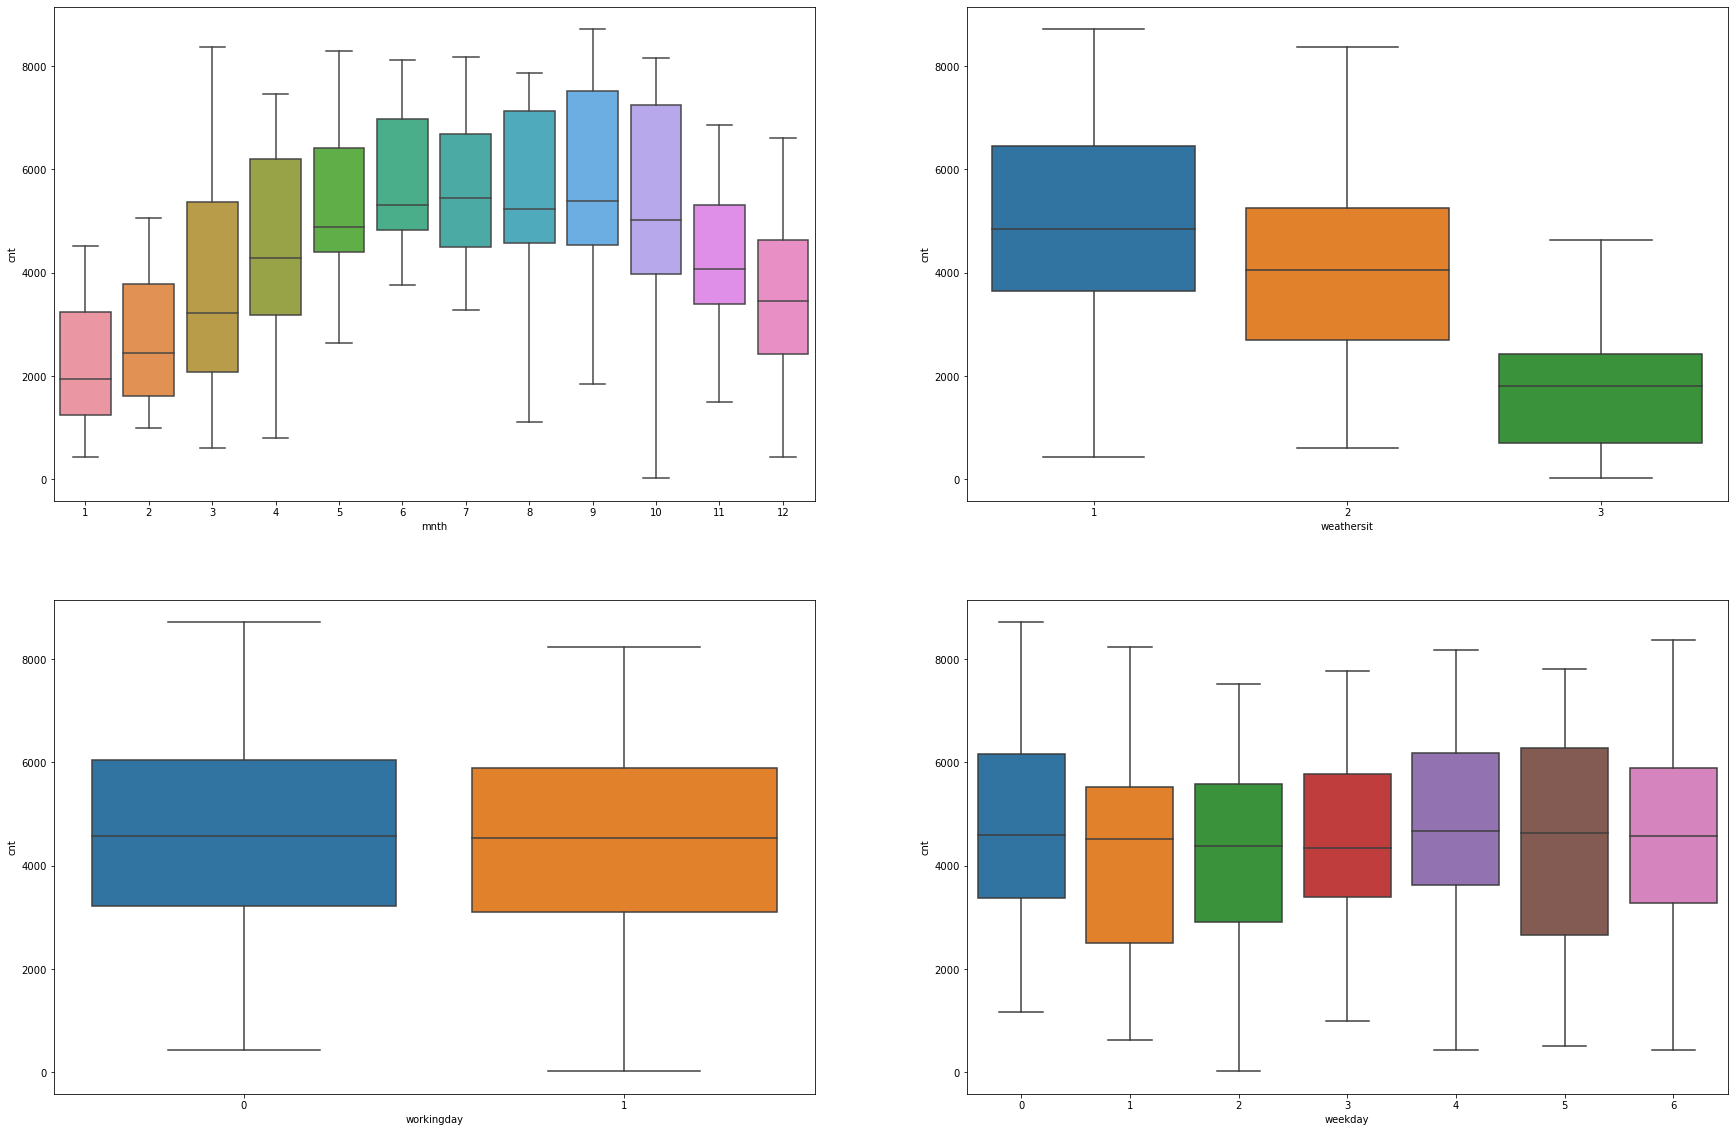

In [25]:
#Lets check for reaminging categorical variable
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.boxplot(x= 'mnth', y= 'cnt', data= rental_bike)

plt.subplot(2,2,2)
sns.boxplot(x= 'weathersit', y= 'cnt', data= rental_bike)

plt.subplot(2,2,3)
sns.boxplot(x= 'workingday', y= 'cnt', data= rental_bike)

plt.subplot(2,2,4)
sns.boxplot(x= 'weekday', y= 'cnt', data= rental_bike)
plt.show()

#### Insights

mnth: 5,6,7,8 and 9 months have a median over 4000 booking per month. It means month have some trend it will good predictor for dependent varibale.

Weathersit: There is also a some trend 'wearthersit1' have a median aprox 5000 boiking for 2 years this will followed by 'weathersit2' with median value aprox 4500 bookings. this will be a good predictor for dependent variable.

Workingday: 68-70% of bike booking were happening in 'workingday' with median aproxx 5000 booking for 2 years. This will be a good predictor for dependent variable.

weekday: We can see in boxplot median of all weedays are not wary much, its have a very close trend, so we can't say now for its a good predictor for dependent variable

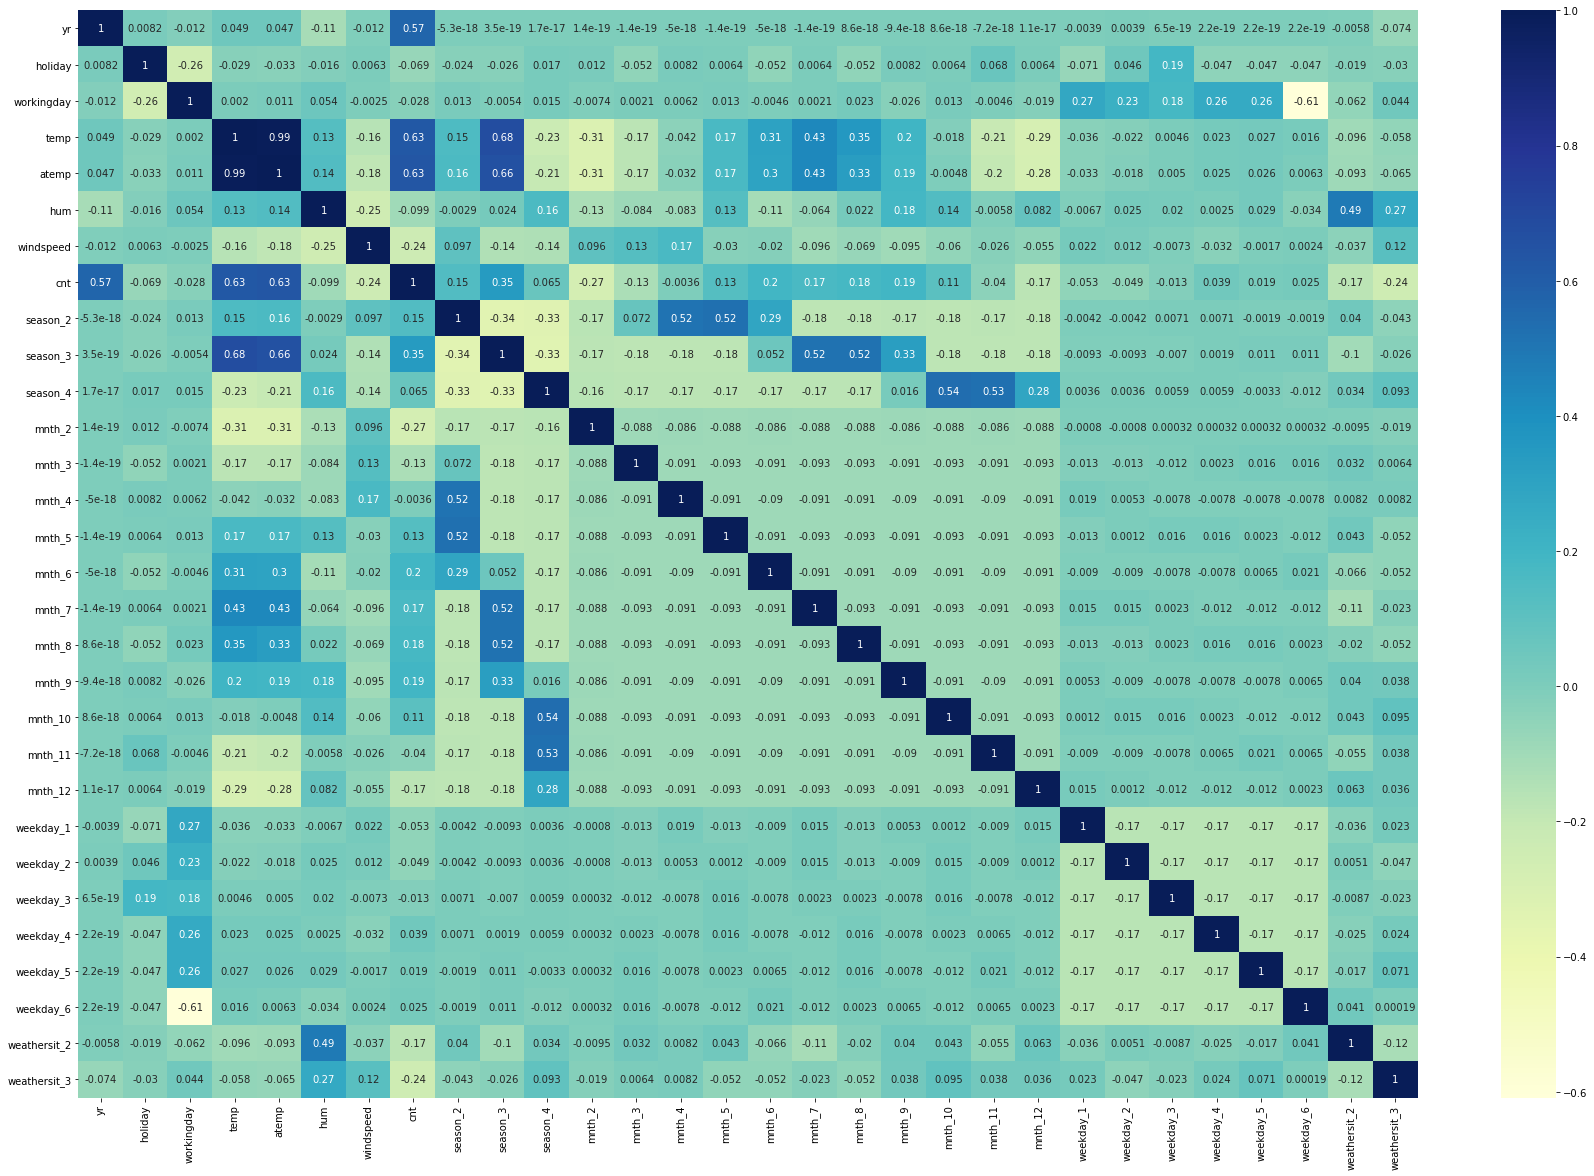

In [26]:
#lets check the corelation by ploting heat map

plt.figure(figsize=(30, 20))
sns.heatmap(bike_new.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### Ingights:
> Now we can clearly say that all variable are multicollinear 
> We can check which variable have high collinearity with the target varibale.

### Rescaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
229,0,0,0,29.178347,33.1129,65.4583,15.624936,3805,0,1,...,0,0,0,0,0,0,0,1,0,0
86,0,0,1,10.838268,12.8787,30.2174,14.217668,2028,1,0,...,0,0,0,0,1,0,0,0,0,0
465,1,0,1,14.296536,16.8637,46.9565,19.783358,4862,1,0,...,0,0,0,0,0,1,0,0,0,0
182,0,0,1,30.271653,33.3654,44.4583,7.709154,5119,0,1,...,0,0,1,0,0,0,0,0,0,0
341,0,0,0,10.899153,12.8469,58.0000,16.083886,3322,0,0,...,0,1,0,0,0,0,0,1,0,0


In [40]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
229,0,0,0,0.813093,0.803463,0.594795,0.434609,0.435228,0,1,...,0,0,0,0,0,0,0,1,0,0
86,0,0,1,0.255711,0.245927,0.145628,0.391308,0.230787,1,0,...,0,0,0,0,1,0,0,0,0,0
465,1,0,1,0.360813,0.355730,0.358978,0.562561,0.556834,1,0,...,0,0,0,0,0,1,0,0,0,0
182,0,0,1,0.846320,0.810421,0.327137,0.191045,0.586401,0,1,...,0,0,1,0,0,0,0,0,0,0
341,0,0,0,0.257562,0.245051,0.499734,0.448731,0.379659,0,0,...,0,1,0,0,0,0,0,1,0,0


In [43]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.494118,0.035294,0.686275,0.548366,0.548997,0.556119,0.350537,0.519485,0.268627,0.24902,...,0.078431,0.084314,0.152941,0.139216,0.149020,0.149020,0.127451,0.141176,0.345098,0.023529
std,0.500456,0.184703,0.464462,0.223762,0.220454,0.176241,0.162957,0.221995,0.443681,0.43287,...,0.269113,0.278131,0.360284,0.346511,0.356457,0.356457,0.333805,0.348545,0.475867,0.151726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.370064,0.423261,0.232055,0.362546,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544672,0.555979,0.561338,0.327568,0.523470,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.747156,0.733011,0.680384,0.441027,0.683473,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building Model

In [44]:
### Dividing into X and Y sets for the model building

In [45]:
y_train = df_train.pop('cnt')  # as 'cnt' is our target variable 
X_train = df_train

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
lm= LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)               #variable =15
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', False, 5),
 ('mnth_5', False, 2),
 ('mnth_6', False, 3),
 ('mnth_7', False, 15),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 7),
 ('weekday_2', False, 6),
 ('weekday_3', False, 8),
 ('weekday_4', False, 11),
 ('weekday_5', False, 13),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'


### Model 1

In [56]:
import statsmodels.api as sm

In [59]:
#add constant
X_train_lm1 = sm.add_constant(X_train_rfe)

#create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

#lr prameters

lr1.params

const           0.215416
yr              0.226644
holiday        -0.042285
temp            0.316859
atemp           0.123331
hum            -0.154607
windspeed      -0.192902
season_2        0.151667
season_3        0.099063
season_4        0.164670
mnth_3          0.049522
mnth_8          0.032365
mnth_9          0.110283
mnth_10         0.048473
weathersit_2   -0.039759
weathersit_3   -0.224574
dtype: float64

In [60]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     170.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.95e-184
Time:                        14:29:29   Log-Likelihood:                 509.27
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2154      0.025      8.612   

#### Model Insights:
R-squared value is 83.8% and adjusted R-square value is 83.4% but if we check P-value 'atemp' feature variable have o.354 which is very high which we cant consider in our model

In [61]:
#lets check VIF value 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create a dataframe with feature variale and there VIFs 

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif= vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
2,temp,397.54
3,atemp,380.58
4,hum,13.17
7,season_3,7.86
5,windspeed,4.13
6,season_2,3.94
8,season_4,3.04
13,weathersit_2,2.31
0,yr,1.89
10,mnth_8,1.80


#### Points:
Now we can see here 'temp', 'atemp', 'hum', 'season_3' have high VIF 

### Model-2

Removing the variable 'atemp' based on its high p-value and High VIF

In [63]:
X_train_2= X_train_rfe.drop(['atemp'], axis = 1)

In [67]:
#add constant
X_train_lm2 = sm.add_constant(X_train_2)

#create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

#lr prameters

lr2.params

const           0.217655
yr              0.226549
holiday        -0.043191
temp            0.438162
hum            -0.153355
windspeed      -0.197436
season_2        0.152257
season_3        0.098471
season_4        0.165194
mnth_3          0.049718
mnth_8          0.029933
mnth_9          0.110221
mnth_10         0.049102
weathersit_2   -0.039917
weathersit_3   -0.225352
dtype: float64

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range (X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif= vif.sort_values(by= 'VIF', ascending = False)
vifvif

,Features,VIF
2,temp,22.97
3,hum,12.91
6,season_3,7.85
4,windspeed,4.04
5,season_2,3.94
7,season_4,3.03
12,weathersit_2,2.30
0,yr,1.89
9,mnth_8,1.76
11,mnth_10,1.73


### points:
Now we can clearly see that VIF value comparatively reduces now but 'tem','hum' and 'season_3' still have high VIF

In [70]:
#lets check the summary
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.1
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.17e-185
Time:                        14:40:25   Log-Likelihood:                 508.82
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     495   BIC:                            -924.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2177      0.025      8.743   

### Model Insights:
Now we can see here R-Square and adjusted R-square have aprrox same value as model first but 'holiday' have p-value 0.049 which very high

### Model 3
Removing the 'holiday' based on its high p-value

In [71]:
X_train_3= X_train_2.drop(['holiday'], axis=1)

In [72]:

vif=pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF']=  [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif =vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
1,temp,22.97
2,hum,12.85
5,season_3,7.85
3,windspeed,4.04
4,season_2,3.93
6,season_4,3.02
11,weathersit_2,2.30
0,yr,1.89
8,mnth_8,1.76
10,mnth_10,1.73


In [77]:
# add a constant
X_train_lm3= sm.add_constant(X_train_3)
# create model
lr3= sm.OLS(y_train, X_train_lm3).fit()


In [78]:
#checking parameters
lr3.params

const           0.216791
yr              0.226455
temp            0.437586
hum            -0.155756
windspeed      -0.198652
season_2        0.153568
season_3        0.099340
season_4        0.166698
mnth_3          0.051836
mnth_8          0.031968
mnth_9          0.110061
mnth_10         0.048464
weathersit_2   -0.039322
weathersit_3   -0.222611
dtype: float64

In [79]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.05e-185
Time:                        14:46:12   Log-Likelihood:                 506.82
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     496   BIC:                            -926.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2168      0.025      8.685   

### Model- 4

Removing 'month_8' on the basis of high p-value

In [81]:
X_train_4= X_train_3.drop(['mnth_8'], axis =1)

In [82]:
#Lets check VIF value now
vif= pd.DataFrame()
vif['Features']= X_train_4.columns
vif['VIF']= [variance_inflation_factor(X_train_4.values, i) for i in range (X_train_4.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
1,temp,22.94
2,hum,12.82
5,season_3,6.82
3,windspeed,4.03
4,season_2,3.93
6,season_4,3.01
10,weathersit_2,2.30
0,yr,1.89
9,mnth_10,1.73
8,mnth_9,1.31


In [83]:
# Add constant
X_train_lm4= sm.add_constant(X_train_4)
#create a fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [84]:
#Lets check Parameters 
lr4.params

const           0.214263
yr              0.227003
temp            0.436431
hum            -0.151397
windspeed      -0.197597
season_2        0.153806
season_3        0.113593
season_4        0.168096
mnth_3          0.051965
mnth_9          0.098862
mnth_10         0.046947
weathersit_2   -0.039350
weathersit_3   -0.224859
dtype: float64

In [85]:
#print the summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.27e-186
Time:                        14:50:52   Log-Likelihood:                 505.24
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     497   BIC:                            -929.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2143      0.025      8.580   

### Model-5

Removing 'hum' on the baisis of high VIF, we are removing 'hum' instead of 'temp' beacuse we need this variable in our model.

In [87]:
X_train_5= X_train_4.drop(['hum'], axis=1)

In [88]:
#lets check VIF 

vif= pd.DataFrame()
vif['Features']= X_train_5.columns
vif['VIF']= [variance_inflation_factor(X_train_5.values, i) for i in range (X_train_5.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
1,temp,14.96
4,season_3,6.40
2,windspeed,3.89
3,season_2,3.85
5,season_4,2.93
0,yr,1.89
8,mnth_10,1.72
9,weathersit_2,1.50
7,mnth_9,1.29
6,mnth_3,1.18


In [89]:
#Add a constant
X_train_lm5= sm.add_constant(X_train_5)

#craete a fitted model
lr5= sm.OLS(y_train, X_train_lm5).fit()

In [90]:
#check the parameters
lr5.params

const           0.138253
yr              0.234668
temp            0.402934
windspeed      -0.155770
season_2        0.159307
season_3        0.127809
season_4        0.166622
mnth_3          0.056164
mnth_9          0.084940
mnth_10         0.045362
weathersit_2   -0.069330
weathersit_3   -0.294578
dtype: float64

In [91]:
#checking summary
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.03e-183
Time:                        14:54:45   Log-Likelihood:                 494.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     498   BIC:                            -914.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1383      0.019      7.318   

### Model 6

#### Removing 'mnth-10' based on the high p-value

In [93]:
X_train_6= X_train_5.drop(['mnth_10'], axis=1)

In [94]:
#lets check VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['Features']= X_train_6.columns
vif['VIF']= [variance_inflation_factor(X_train_6.values, i) for i in range (X_train_6.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
1,temp,14.47
4,season_3,6.30
2,windspeed,3.84
3,season_2,3.78
5,season_4,2.51
0,yr,1.88
8,weathersit_2,1.50
7,mnth_9,1.27
6,mnth_3,1.18
9,weathersit_3,1.10


In [95]:
#Add a constant
X_train_lm6= sm.add_constant(X_train_6)

#craete a fitted model
lr6= sm.OLS(y_train, X_train_lm6).fit()

In [96]:
# check parameter
lr6.params

const           0.131941
yr              0.234395
temp            0.422070
windspeed      -0.155746
season_2        0.153369
season_3        0.119576
season_4        0.181431
mnth_3          0.056294
mnth_9          0.080080
weathersit_2   -0.067916
weathersit_3   -0.289447
dtype: float64

In [97]:
#Lets print summary
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          7.65e-183
Time:                        14:57:05   Log-Likelihood:                 491.61
No. Observations:                 510   AIC:                            -961.2
Df Residuals:                     499   BIC:                            -914.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1319      0.019      7.007   

## Model 7

Lets drop 'season_3'based on high VIF value

In [106]:
X_train_7=X_train_6.drop(['season_3'], axis=1)

In [107]:
#lets check VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['Features']= X_train_7.columns
vif['VIF']= [variance_inflation_factor(X_train_7.values, i) for i in range (X_train_7.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
1,temp,3.93
2,windspeed,3.68
0,yr,1.87
3,season_2,1.65
7,weathersit_2,1.50
4,season_4,1.41
6,mnth_9,1.19
5,mnth_3,1.14
8,weathersit_3,1.09


In [108]:
#Add a constant
X_train_lm7= sm.add_constant(X_train_7)

#craete a fitted model
lr7= sm.OLS(y_train, X_train_lm7).fit()

In [109]:
#print summary
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.0
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.34e-177
Time:                        17:27:11   Log-Likelihood:                 475.80
No. Observations:                 510   AIC:                            -931.6
Df Residuals:                     500   BIC:                            -889.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1115      0.019      5.856   

In [110]:
X_train_8=X_train_7.drop(['mnth_3'], axis=1)

In [111]:

vif=pd.DataFrame()
vif['Features']= X_train_8.columns
vif['VIF']= [variance_inflation_factor(X_train_8.values, i) for i in range (X_train_8.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
1,temp,3.89
2,windspeed,3.45
0,yr,1.87
3,season_2,1.65
6,weathersit_2,1.50
4,season_4,1.38
5,mnth_9,1.19
7,weathersit_3,1.09


In [118]:
#Add a constant
X_train_lm8= sm.add_constant(X_train_8)

#craete a fitted model
lr8= sm.OLS(y_train, X_train_lm8).fit()
lr8.params

const           0.120715
yr              0.232690
temp            0.558417
windspeed      -0.156752
season_2        0.087033
season_4        0.129541
mnth_9          0.100636
weathersit_2   -0.067856
weathersit_3   -0.276944
dtype: float64

In [117]:

print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.46e-177
Time:                        01:06:23   Log-Likelihood:                 472.50
No. Observations:                 510   AIC:                            -927.0
Df Residuals:                     501   BIC:                            -888.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1207      0.019      6.421   

### Model insingts:
Now all the feature variable looks good and to be very low muliticollinearity between the predictors and P-values for all the predictors seems to be significant. 
Lets finalize this model for now

## Model Interpretation

#### hypothesis Testing:

Hypothesis testing states that:

H0:B1=B2=...=Bn=0 H1: at least one Bi!=0

We can say that from summary of final model(model 5) all cofficient have some value they are not equal to zero so We REJECT the NULL HYPOTHESIS

### More insights

This model have F-Statistics value of 219.6 (which is greater than 1) and the p-value of '~0.0000'

All the p-vlues are less the 0.005

Difrence between R-sqaure and Adjusted- square are thess than 5 %

Overall this model is significant

### Coeficient
const           0.120715
yr              0.232690
temp            0.558417
windspeed      -0.558417
season_2        0.087033
season_4        0.129541
mnth_9          0.100636
weathersit_2   -0.067856
weathersit_3   -0.276944

### The equation of best fitted surface based on model lr8:

cnt = 0.131941 + (yr × 0.232690) + (temp × 0.558417) − (windspeed × 0.558417) + (season2 × 0.087033) +(season4 × 0.129541) + (mnth_9 × 0.100636) − (weathersit2 × 0.067856) − (weathersit3 × 0.276944)

### Interpretation of Coefficients

#### yr: A coefficient value of ‘0.232690’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.232690 units.

#### temp: A coefficient value of ‘0.558417’ indicated that a unit increase in temp variable, increases the bike booking numbers by 0.558417 units.

#### windspeed: A coefficient value of ‘-0.558417’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.558417 units.

#### season_2: A coefficient value of ‘0.087033’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.087033 units.

#### season_4: A coefficient value of ‘0.129541’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.129541 units.

#### mnth_9: A coefficient value of ‘0.100636’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.100636 units.

#### weathersit_2: A coefficient value of ‘-0.276944’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.276944 units.

#### weathersit_4: A coefficient value of ‘-0.289447’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit4 variable, decreases the bike hire numbers by 0.289447 units.

#### const: The Constant value of ‘0.120715’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental booking can still increase by 0.120715 units.

## ASSUMPTIONS


### Error terms are normally distributed with mean zero (not X, Y)

In [119]:
# residual analysis 

y_train_pred = lr8.predict(X_train_lm8)

In [ ]:
# Plot the histogram of the error terms

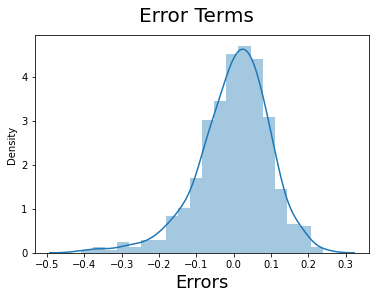

In [120]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    
plt.show()

We can see that it error term is normally distributed

### linear relationship between X and Y

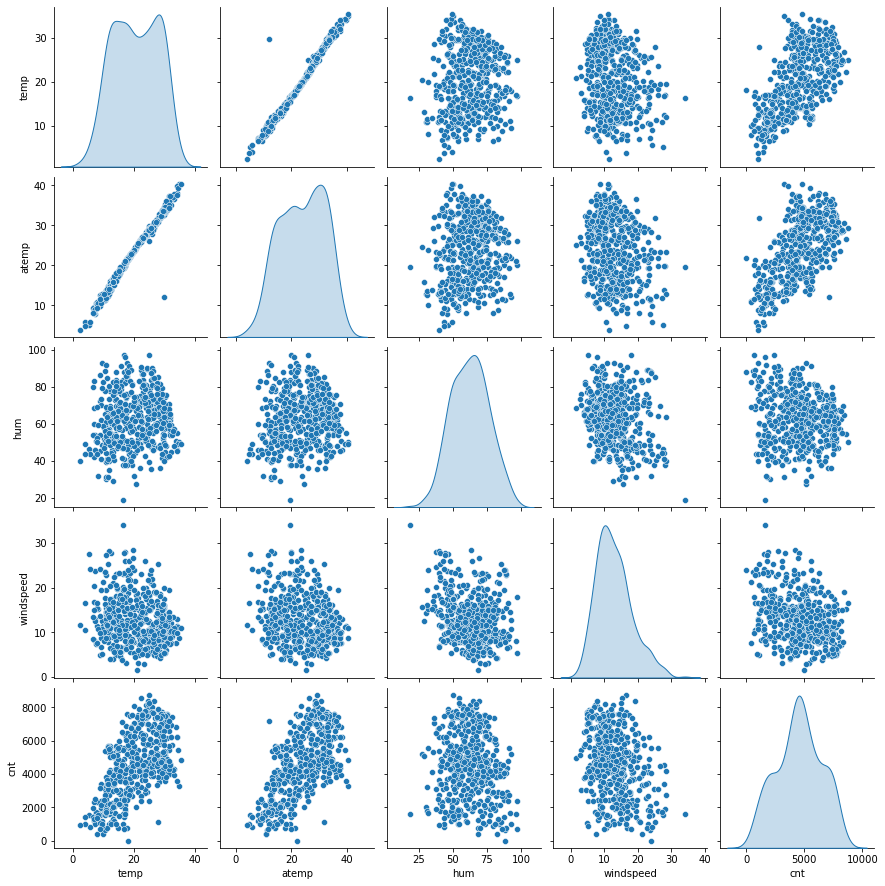

In [121]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#### There is No Multicollinearity between the predictor variables

In [123]:
# Checking for the VIF values. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.89
2,windspeed,3.45
0,yr,1.87
3,season_2,1.65
6,weathersit_2,1.50
4,season_4,1.38
5,mnth_9,1.19
7,weathersit_3,1.09


#### Insight:
    we can see that all the values of VIF is under permisible value 5.

## Prediction model

#### will make a prediction model with our final model-8

In [125]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [126]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
256,0,0,1,0.765327,0.754750,0.648964,0.298736,0.547975,0,1,...,0,0,0,0,0,0,1,0,0,0
254,0,0,1,0.729210,0.720624,0.642707,0.137137,0.539692,0,1,...,0,0,0,0,1,0,0,0,0,0
249,0,0,1,0.672912,0.640854,0.929368,0.153852,0.227105,0,1,...,0,0,0,0,0,0,1,0,0,1
508,1,0,1,0.742483,0.726920,0.673925,0.310273,0.776346,1,0,...,0,0,0,0,0,0,1,0,0,0
109,0,0,1,0.667720,0.668632,0.543282,0.452579,0.451220,1,0,...,0,0,0,0,0,0,1,0,0,0


In [127]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.511416,0.013699,0.703196,0.532638,0.534406,0.570238,0.337573,0.506715,0.214612,0.278539,...,0.091324,0.086758,0.123288,0.155251,0.127854,0.127854,0.178082,0.141553,0.315068,0.041096
std,0.501015,0.116503,0.457896,0.238459,0.234352,0.193463,0.152768,0.224066,0.411493,0.449307,...,0.288730,0.282125,0.329520,0.362974,0.334692,0.334692,0.383458,0.349389,0.465607,0.198967
min,0.000000,0.000000,0.000000,0.060271,0.055477,-0.239512,0.047450,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332325,0.335935,0.424057,0.230151,0.349804,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.552460,0.563381,0.555496,0.324359,0.510354,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.727787,0.703710,0.425641,0.678613,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.983385,1.049574,0.970791,0.864144,0.951680,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
### lets Divide into X-test and y_test

In [129]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 256 to 461
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [131]:
#Selecting the variables from of final model.
col1=X_train_8.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 256 to 461
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_2  219 non-null    uint8  
 8   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.6 KB


In [132]:
y_pred = lr8.predict(X_test_lm8)

## Evaluate the model

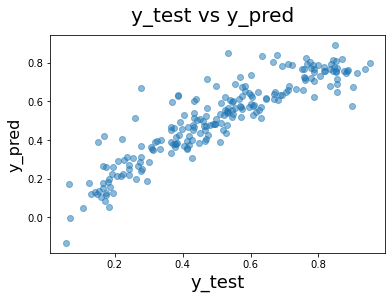

In [133]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                      
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### Lets check the R^2 value for Test

In [135]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8172784267672601

In [138]:
#Lets assign it to r2
r2= 0.8172784267672601

### Lets calculate Adjudted R square

In [139]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) 
p = X_test.shape[1]

#  Adjusted R-squared formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8103176049298224

### Comparision Points:
### Train R^2 :0.813
### Train Adjusted R^2:0.810
### Test R^2 :0.8172
    
### Test Adjusted R^2 :0.8103
    
#### This seems to be a really good model that can very well 'Generalize' various datasets.
    

In [140]:
#Lets check the Final model summary and a final report of the model

print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.46e-177
Time:                        01:39:43   Log-Likelihood:                 472.50
No. Observations:                 510   AIC:                            -927.0
Df Residuals:                     501   BIC:                            -888.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1207      0.019      6.421   

## BEST FIT LINE

### cnt = 0.120715 + (yr × 0.232690) + (temp × 0.558417) − (windspeed × 0.558417) + (season2 × 0.087033) +(season4 × 0.129541) + (mnth_9 × 0.100636) − (weathersit2 × 0.067856) − (weathersit3 × 0.276944)

# Final Report

## Now weare able to find the top predictor variable that influences the bike booking

#### 'temp' column which refers to temperature has a coefficient value of '0.558417' indicate that increase in temp variable increases the bike hire numbers by 0.5584 units. 

#### 'weathersit_3' column which refers to Weather Situation 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) has a coefficient value of ‘-0.276944’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2769 units.

#### 'yr' columns which refers to Year has a coefficient value of ‘0.23269’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.22690 units.

#### 'season_4' column refer to winter has a coefficient coefficient value of ‘0.129541’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.129541 units.

#### 'windspeed' refer to spped of wind has a coefficient value of ‘-0.156752’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.156752 units.

## company needs to focus on below points for expansion of business:

### Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

### Company will increase there business during Summer and winter

### September and October month is good expand business.